In [1]:
from pprint import pprint as pp
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import os
import json
import datetime

def unix2datetime(ts):
    return datetime.datetime.fromtimestamp(ts)

def load_json(filename):
    with open(filename,'r',encoding='utf-8') as f:
        return json.load(f)

def load_data(filename):
    if 'txt' in filename or 'csv' or 'json' in  filename:
        ip_list=[]
        with open(filename,'r') as f:
            ip_list=f.readlines()
        return [i.strip().replace('null','None').replace('true','True').replace('false','False') for i in ip_list]
    else:
        import pickle
        with open(filename,'rb') as f:
            return pickle.load(f)
        
def getfilelist(cur_path):
    filelist=[]
    for parent,dirs,files in os.walk(cur_path):
        flist=list(map(lambda x:os.path.join(parent,x),files))
        filelist.extend(flist)
    return filelist



    
import matplotlib.pyplot as plt
%matplotlib inline
import warnings #忽略告警信息****
warnings.filterwarnings("ignore") #忽略告警信息****
%config InlineBackend.figure_format = 'retina'

plt.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# import matplotlib.ticker as mticker  
import matplotlib

import matplotlib as mpl


In [2]:
ns=[
'shuni.icbc.com.cn.',
'ns114.icbc.com.cn.'  ,
'bjtns2.icbc.com.cn.' ,
'shtns.icbc.com.cn.'  ,
'cns2.icbc.com.cn.' ,  
'tns1.icbc.com.cn.'  , 
]
measurelist=[
'www.icbc.com.cn' 		 ,
'mybank.icbc.com.cn'		 ,
'fee.icbc.com.cn'		 ,
'mall.icbc.com.cn'		 ,
'image4.mall.icbc.com.cn' ,
'elife.icbc.com.cn'		 ,
'm.elearning.icbc.com.cn' ,
'vald.rtcp.icbc.com.cn'	 ,
'myebank2.icbc.com.cn'	 ,
'icbc-am.icbc.com.cn'	 ,				 
]

In [3]:
%%time
import ijson
j=[]
f = '/home/nly/thu_ftp/dns_ana/2022-07-14/A.json'
with open(f,'r') as file:
    # obj = ijson.kvitems(file, 'item')
    objects = ijson.items(file, 'item')
    j.extend( [o for o in objects])

CPU times: user 27.1 s, sys: 5min 1s, total: 5min 28s
Wall time: 5min 28s


In [4]:
j[1]

{'ldns': '119.29.29.29',
 'adns': 'bjtns2.icbc.com.cn.',
 'domain': 'vald.rtcp.icbc.com.cn',
 'udp_buffer_size': '-1',
 'q_type': 'A',
 'answers': 'dmFsZC5ydGNwLmljYmMuY29tLmNuLgk0MglJTglBCTE0MC4yMDYuNTQuMTA0Cg==',
 'query_time': '55',
 'msgsize': '66',
 'monitor': '222.42.238.210',
 'dns_ip': '60.247.99.245',
 'collect_time': '1657808142000',
 'answer_num': '1',
 'nxd_1': ';54;55;55;55;58',
 'adns_2_latency': ';54;53;55;54;55',
 'adns_2_status': ';NOERROR;NOERROR;NOERROR;NOERROR;NOERROR',
 'ips': '140.206.54.104;',
 'collect_date': '2022-07-14'}

In [5]:
# DEMO减少演示数据量
# j = j[:5000]

In [35]:
# v4 数据

allrecord={}

# for f in j:
#     try:    allrecord.update(load_json(f))
#     except:pass
# del(dfall)
dfall = pd.DataFrame(j)
dfall = dfall.drop(['answers'],axis=1)


import datetime
import time
# df['datetime']=df.apply(lambda x:datetime.fromtimestamp(float(x.name)),axis=1) # 这个的输入是 index 挺好
# df['datetime']=df.apply(lambda x:time.strptime(x['Time'],'%Y-%m-%d %H:%M:%S'),axis=1) # 这个的输入 是 Time，输出是timestruct
# dfall['datetime']=dfall.apply(lambda x:pd.to_datetime(int(x['collect_time'])/1000),axis=1) #这个也挺好
# time.strptime('2022-04-09 13:07:53', "%Y-%m-%d %H:%M:%S") # time.struct
dfall['datetime']=dfall.apply(lambda x:unix2datetime(int(x['collect_time'])/1000),axis=1) #这个也挺好

dfall = dfall.set_index(['collect_time'],drop=False)

dfall = dfall.sort_index(axis=0) # 按 index 排序，默认升序

dfall['query_time'] = dfall['query_time'].astype(int)

print(len(dfall))

# dfv4 = dfall.copy(deep=True)

1689120


In [36]:
df = dfall
df[:3]

,ldns,adns,domain,udp_buffer_size,q_type,query_time,msgsize,monitor,dns_ip,collect_time,answer_num,nxd_1,adns_2_latency,adns_2_status,ips,collect_date,datetime
collect_time,,,,,,,,,,,,,,,,,
1657728004000,119.29.29.29,shuni.icbc.com.cn.,mall.icbc.com.cn,-1,A,58,118,111.48.88.50,211.95.81.245,1657728004000,3,;42;40;40;36;29,;33;31;29;50;38,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.48.88.194;111.48.88.193;,2022-07-14,2022-07-14 00:00:04
1657728004000,119.29.29.29,cns2.icbc.com.cn.,elife.icbc.com.cn,-1,A,31,62,111.48.88.50,202.106.83.125,1657728004000,1,;38;29;32;32;29,;31;30;27;27;34,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,120.204.111.141;,2022-07-14,2022-07-14 00:00:04
1657728004000,119.29.29.29,ns114.icbc.com.cn.,vald.rtcp.icbc.com.cn,-1,A,153,66,111.48.88.50,114.114.116.136,1657728004000,1,;34;38;43;34;39,;40;43;45;45;51,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,120.204.111.127;,2022-07-14,2022-07-14 00:00:04


In [9]:
# 我还是先直接测试 3 sigma算法吧
# 先把 phase_1 和 phase_2 的平均值算出来
# 等一下，还得先拆分df，因为一个时间点上有 6(adns)*10(domain) 条数据，而且 monitor也有很多个，要挑一个出来

df = dfall
df[:600:60]

,ldns,adns,domain,udp_buffer_size,q_type,query_time,msgsize,monitor,dns_ip,answer_num,nxd_1,adns_2_latency,adns_2_status,ips,collect_date,datetime
collect_time,,,,,,,,,,,,,,,,
1657806942000,119.29.29.29,bjtns2.icbc.com.cn.,elife.icbc.com.cn,-1,A,55,62,222.42.238.210,60.247.99.245,1,;54;54;55;55;54,;54;53;55;53;53,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,116.236.244.251;,2022-07-14,2022-07-14 21:55:42
1657806965000,218.203.123.116,bjtns2.icbc.com.cn.,m.elearning.icbc.com.cn,-1,A,2,116,111.51.75.196,60.247.99.245,2,;0;1;2;14;0,;26;30;34;35;42,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.12.223.168;,2022-07-14,2022-07-14 21:56:05
1657806984000,203.62.139.69,bjtns2.icbc.com.cn.,mybank.icbc.com.cn,-1,A,1,63,101.227.98.80,60.247.99.245,1,;2;1;2;2;1,;26;27;26;28;27,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,180.169.80.55;,2022-07-14,2022-07-14 21:56:24
1657807049000,222.74.1.200,bjtns2.icbc.com.cn.,image4.mall.icbc.com.cn,-1,A,0,168,1.182.188.138,60.247.99.245,2,;0;0;0;0;0,;24;28;27;27;28,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,36.111.131.88;,2022-07-14,2022-07-14 21:57:29
1657807108000,202.99.224.67,bjtns2.icbc.com.cn.,icbc-am.icbc.com.cn,-1,A,11,53,1.25.242.80,60.247.99.245,1,;6;8;5;6;8,;20;15;17;20;23,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,123.127.121.21;,2022-07-14,2022-07-14 21:58:28
1657807223000,119.29.29.29,bjtns2.icbc.com.cn.,m.elearning.icbc.com.cn,-1,A,92,105,117.145.179.148,60.247.99.245,2,;67;69;71;68;83,;59;52;58;63;54,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.12.223.168;,2022-07-14,2022-07-14 22:00:23
1657807237000,119.29.29.29,bjtns2.icbc.com.cn.,image4.mall.icbc.com.cn,-1,A,20,148,182.40.33.188,60.247.99.245,4,;30;18;17;13;18,;29;24;17;16;15,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,115.223.7.201;150.138.104.37;150.138.105.27;,2022-07-14,2022-07-14 22:00:37
1657807242000,202.96.128.166,bjtns2.icbc.com.cn.,mall.icbc.com.cn,-1,A,1,548,14.29.116.13,60.247.99.245,13,;3;1;2;2;1,;35;37;35;37;33,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,117.27.241.153;117.27.241.152;121.12.91.94;222...,2022-07-14,2022-07-14 22:00:42
1657807253000,202.101.224.68,bjtns2.icbc.com.cn.,fee.icbc.com.cn,-1,A,6,60,218.64.94.215,60.247.99.245,1,;15;25;17;7;5,;35;35;39;41;37,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,180.169.80.58;,2022-07-14,2022-07-14 22:00:53


In [9]:
len(df[df['monitor']=='222.42.238.210'])

17280

In [37]:
# 选定一个client
p = '222.42.238.210'
df = df[df['monitor']==p]

In [11]:
# 看是个多久打一个点 5min 300s 打一个点

In [38]:
# 抽一个组合出来
adns = 'shuni.icbc.com.cn.'
domain = 'fee.icbc.com.cn'
adns_domain = pd.DataFrame([{'adns':adns,'domain':domain}])

In [24]:
adns_domain

,adns,domain
0,shuni.icbc.com.cn.,fee.icbc.com.cn


In [39]:
tmp = pd.merge(adns_domain,df,how="left")

In [40]:
len(tmp) # 288*5/60 = 24h

288

In [53]:
tmp[:3]

,adns,domain,ldns,udp_buffer_size,q_type,query_time,msgsize,monitor,dns_ip,collect_time,answer_num,nxd_1,adns_2_latency,adns_2_status,ips,collect_date,datetime
0,shuni.icbc.com.cn.,fee.icbc.com.cn,119.29.29.29,-1,A,56,60,222.42.238.210,211.95.81.245,1657728042000,1,;54;55;55;54;54,;135;121;118;115;122,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.200.33.56;,2022-07-14,2022-07-14 00:00:42
1,shuni.icbc.com.cn.,fee.icbc.com.cn,119.29.29.29,-1,A,66,60,222.42.238.210,211.95.81.245,1657728342000,1,;55;55;55;55;54,;82;79;81;88;84,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.200.33.56;,2022-07-14,2022-07-14 00:05:42
2,shuni.icbc.com.cn.,fee.icbc.com.cn,119.29.29.29,-1,A,87,60,222.42.238.210,211.95.81.245,1657728642000,1,;56;54;54;57;56,;69;69;71;69;71,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,123.127.121.186;,2022-07-14,2022-07-14 00:10:42


In [55]:
tmp[-220:-218]

,adns,domain,ldns,udp_buffer_size,q_type,query_time,msgsize,monitor,dns_ip,collect_time,answer_num,nxd_1,adns_2_latency,adns_2_status,ips,collect_date,datetime
68,shuni.icbc.com.cn.,fee.icbc.com.cn,119.29.29.29,-1,A,55,60,222.42.238.210,211.95.81.245,1657748442000,1,;54;54;54;54;54,;48;48;48;49;48,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,111.200.33.56;,2022-07-14,2022-07-14 05:40:42
69,shuni.icbc.com.cn.,fee.icbc.com.cn,119.29.29.29,-1,A,54,60,222.42.238.210,211.95.81.245,1657748742000,1,;54;55;54;54;54,;49;49;48;49;48,;NOERROR;NOERROR;NOERROR;NOERROR;NOERROR,61.129.111.47;,2022-07-14,2022-07-14 05:45:42


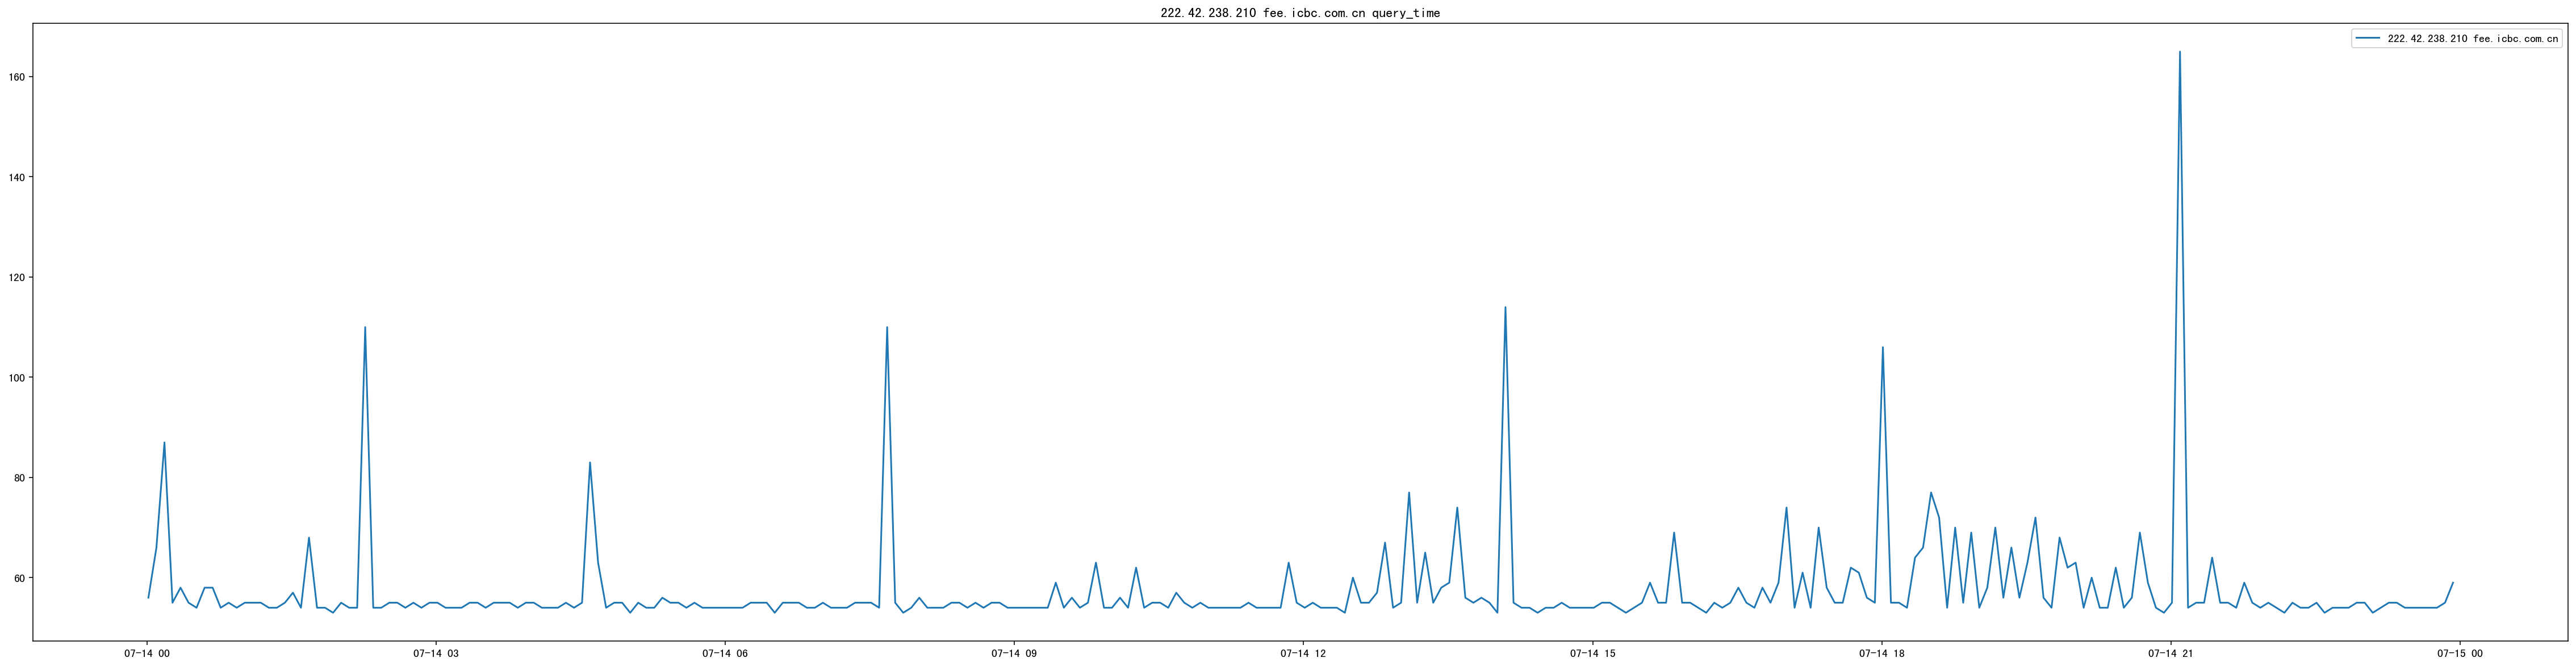

In [28]:
# 画图

# 在一段时间内 3sigma均出现不正常才报警，需要设计这个一段时间 和3sigma的时间窗口

metric='query_time'

plt.figure(figsize=(40,10))
# tp = df[df['monitor']==p]


chosen_label = p+' '+domain
# tmp = tp[tp['domain']==domain]
y = list(tmp[metric])
x = list(tmp['datetime'])

plt.plot(x,y,label=chosen_label)


plt.title(chosen_label+' '+metric)
plt.legend()

In [34]:
tmp.columns

Index(['adns', 'domain', 'ldns', 'udp_buffer_size', 'q_type', 'query_time',
       'msgsize', 'monitor', 'dns_ip', 'answer_num', 'nxd_1', 'adns_2_latency',
       'adns_2_status', 'ips', 'collect_date', 'datetime'],
      dtype='object')